# **AIR QUALITY INDEX PREDICTION USING TIME SERIES FORECASTING**

**UCI AIR QUALITY DATASET**

**DATASET INFORMATION**
1. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.
**Attribute Information**
0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. RH Relative Humidity (%)
14. AH Absolute Humidity

**Desired Output**
1. RH-Relative Humidity(%)

**Model Trained On**
1. FB Prophet



# **Importing important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the dataset into DATAFRAME**

In [2]:
# loading the data to pandas data frame
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv')

In [3]:
# printing the data
air_quality_data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


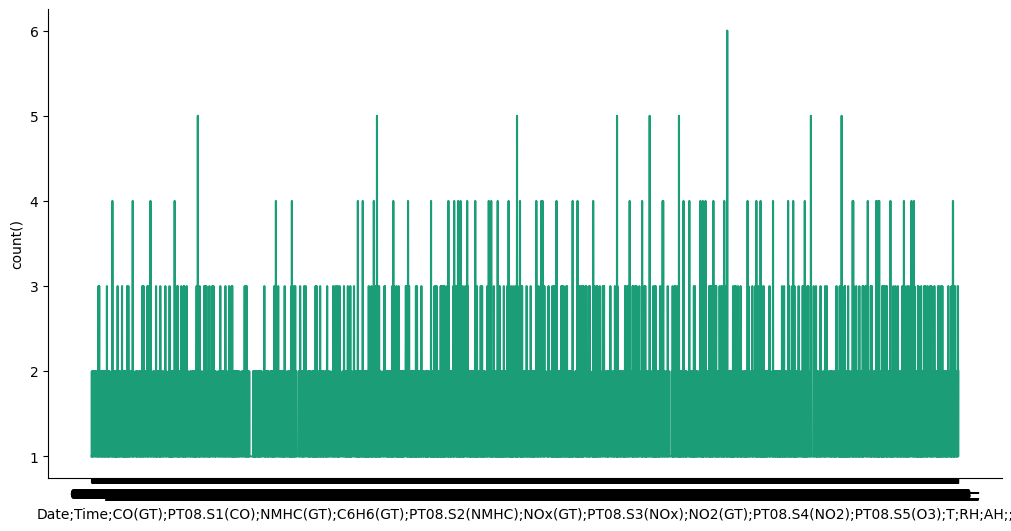

In [4]:
# @title Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;; vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;'}, axis=1)
              .sort_values('Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;', ascending=True))
  xs = counted['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = air_quality_data.sort_values('Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;')
_ = plt.ylabel('count()')

In [5]:
# loading the data to pandas data frame
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv',sep=';',decimal=',')

In [6]:
# printing the data
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


# **Data Cleaning and Transformation**

In [7]:
# removing last two unwanted columns
air_quality_data = air_quality_data.iloc[:, :-2]

In [8]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
# printing last five rows
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
air_quality_data.shape

(9471, 15)

In [11]:
#removing empty columns at the end
#there is 9356 last data point and remaining are null values
# index is 9356 and actual rows are 9357
# therefore we are taking only 9357 rows from the dataframe
air_quality_data = air_quality_data.head(9357)
air_quality_data.head()
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [12]:
air_quality_data.shape

(9357, 15)

In [13]:
# information about dataset
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


**In the dataset the missing values are tagged as -200.This is given in UCI repository. So we need to replace this -200 value**

In [14]:
#counting the number of times -200 is appeared in the data
air_quality_data.isin([-200 ]).sum(axis=0)

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


# **Handling the missing Values**

**To handle the missing values we will replace first -200 by NaN and then we will put the mean value of whole column in the missing value spaces**

In [15]:
#convert all -200 to NaN
air_quality_data = air_quality_data.replace(to_replace=-200, value= np.NaN)

In [16]:
#checking for missing values
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


**Converting NaN values to the mean value of that column**

In [17]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [18]:
# Calculate the mean of only the numeric columns
air_quality_data.mean(numeric_only=True)

,0
CO(GT),2.152750
PT08.S1(CO),1099.833166
NMHC(GT),218.811816
C6H6(GT),10.083105
PT08.S2(NMHC),939.153376
NOx(GT),246.896735
PT08.S3(NOx),835.493605
NO2(GT),113.091251
PT08.S4(NO2),1456.264598
PT08.S5(O3),1022.906128


In [19]:
#replacing the missing values with mean value of each column
air_quality_data.fillna(air_quality_data.mean(numeric_only=True), inplace=True)

In [20]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [77]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


**Checking the correlation of all features with Multivariant**

In [78]:
sns.pairplot(air_quality_data)

Output hidden; open in https://colab.research.google.com to view.

In [79]:
#all features correlations
# Select numerical features for correlation analysis
numerical_features = air_quality_data.select_dtypes(include=['number'])

# Calculate correlation matrix
numerical_features.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.232979,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.240592,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751


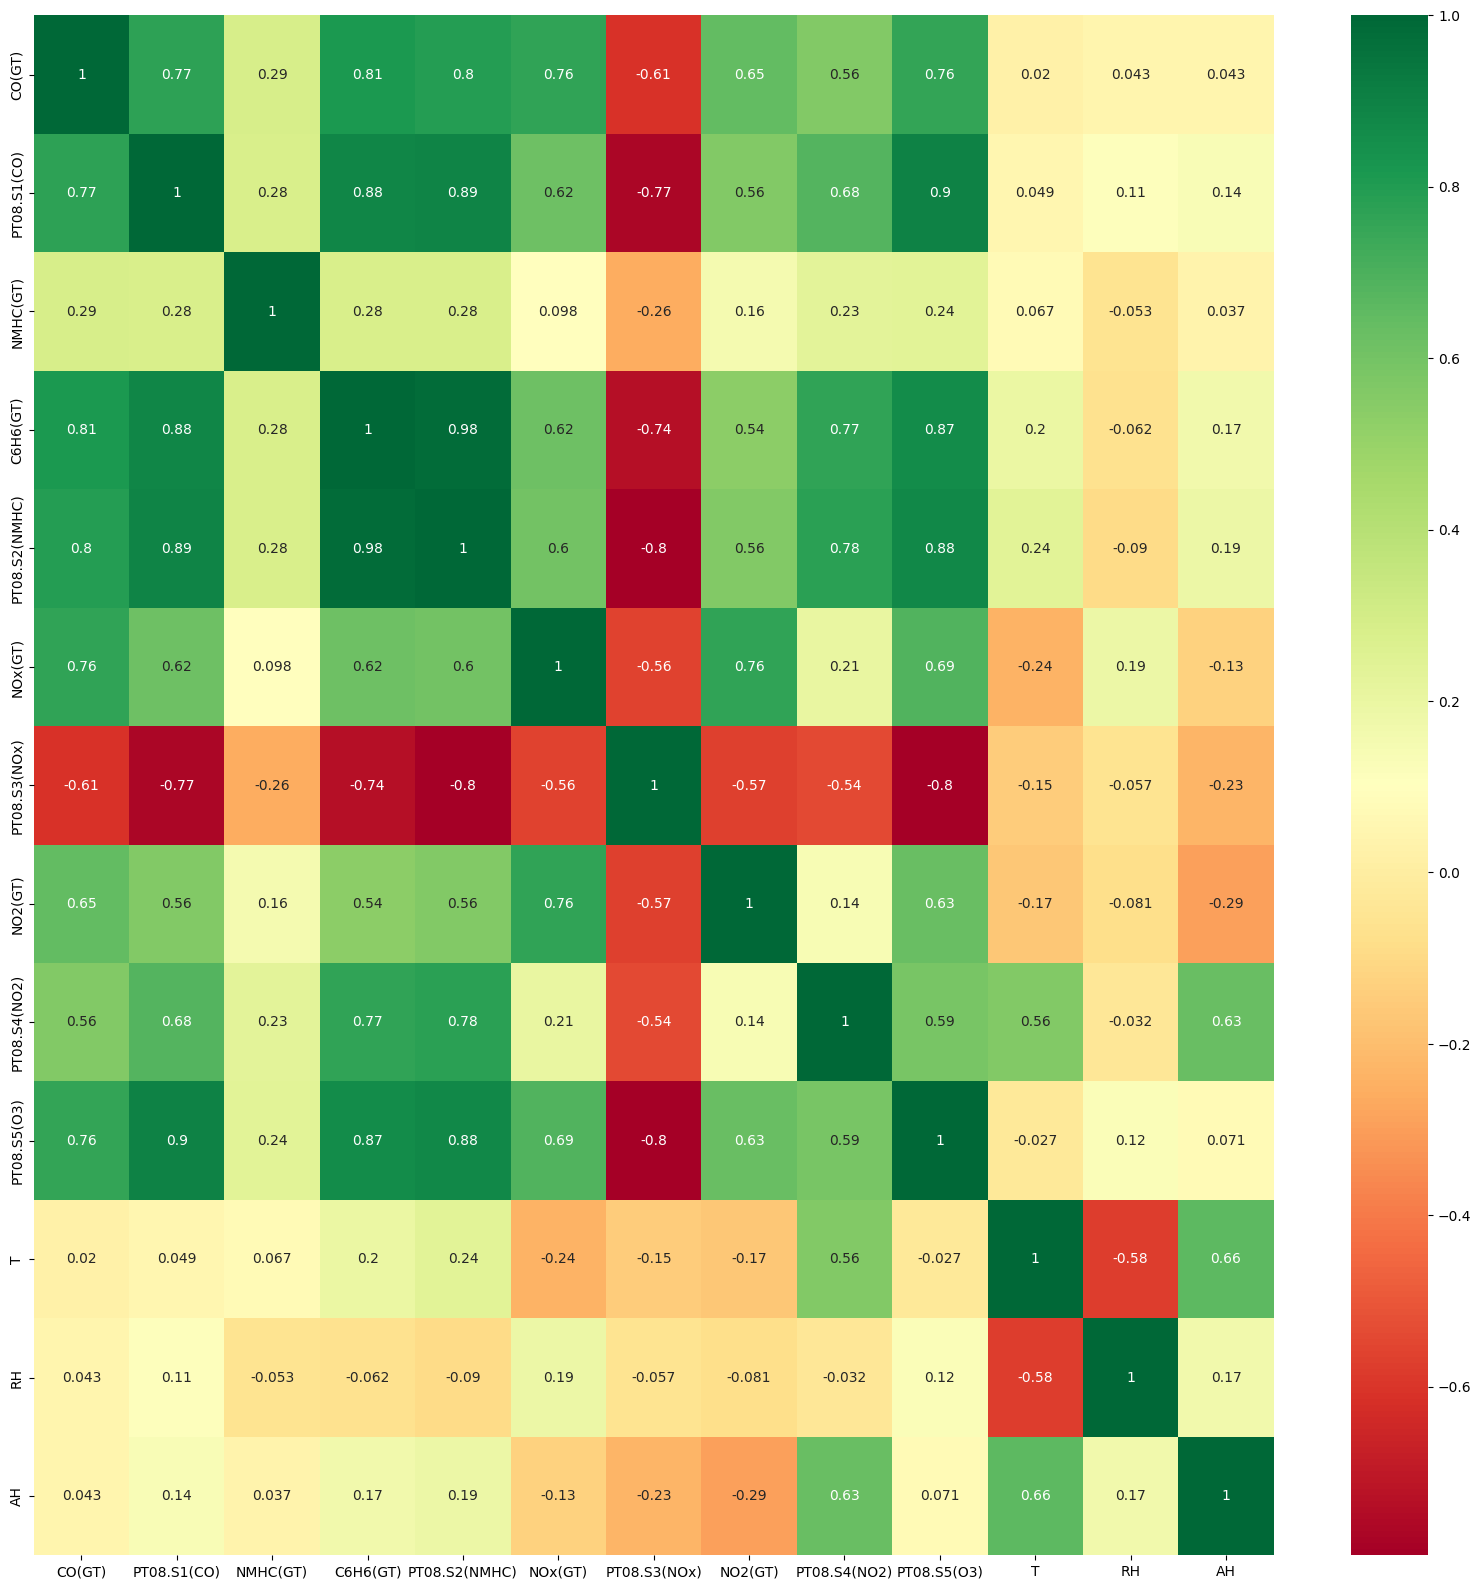

In [80]:
corrmat = numerical_features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(numerical_features[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# **Now our Data Preprocessing has been done.**

## 1.**Forecasting with FB Prophet Algorithm**

In [81]:
# Changed the format to '%d/%m/%Y' to match the day/month/year format.
date_info = pd.to_datetime(air_quality_data['Date'], format='%d/%m/%Y')
print(date_info)


0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [82]:
time_info = air_quality_data['Time']

In [83]:
#converting time to HH:MM:SS format
time_info= time_info.apply(lambda x: x.replace('.',':'))
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [84]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [85]:
# combining two series to a pandas dataframe
date_time = pd.concat([date_info, time_info], axis=1)

In [86]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [87]:
date_time.shape

(9357, 2)

In [88]:
# combining date nd time
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)

In [89]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [90]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


### **We have to convert ds from object to datetime format**

In [91]:
data = pd.DataFrame()

In [92]:
data['ds']= pd.to_datetime(date_time['ds'])

In [93]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [94]:
data['y']= air_quality_data['RH']

In [95]:
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


In [96]:
! pip install prophet

In [97]:
from prophet import Prophet

## **Train Test Split**

In [98]:
'''train = data[data['ds'] < pd.Timestamp('2004-12-15')]
test = data[data['ds'] >= pd.Timestamp('2004-12-15')]
print(f"Number of months in train data: {len(train)}")
print(f"Number of months in test data: {len(test)}")'''
# Define the split point (e.g., last 3 months for testing)
split_date = data['ds'].max() - pd.DateOffset(months=3)
train = data[data['ds'] < split_date]
test = data[data['ds'] >= split_date]
print(f"Number of months in train data: {len(train)}")
print(f"Number of months in test data: {len(test)}")

Number of months in train data: 7196
Number of months in test data: 2161


In [99]:
# training the Prophet model
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9k9chpl/zqj2q14q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9k9chpl/cmjy9tpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6040', 'data', 'file=/tmp/tmph9k9chpl/zqj2q14q.json', 'init=/tmp/tmph9k9chpl/cmjy9tpp.json', 'output', 'file=/tmp/tmph9k9chpl/prophet_modeldot95xmz/prophet_model-20240913141925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [100]:
# Create a dataframe for future dates (including test period)
future = model.make_future_dataframe(periods=len(test), freq='H')


In [101]:
future.tail()

,ds
9352,2005-04-04 10:00:00
9353,2005-04-04 11:00:00
9354,2005-04-04 12:00:00
9355,2005-04-04 13:00:00
9356,2005-04-04 14:00:00


In [104]:
forecast = model.predict(future)
# Extract the forecasted values for the test period
forecasted = forecast[['ds', 'yhat']].tail(len(test))
print(forecasted)


                      ds       yhat
7196 2005-01-04 14:00:00  40.905524
7197 2005-01-04 15:00:00  40.826580
7198 2005-01-04 16:00:00  41.213946
7199 2005-01-04 17:00:00  42.708454
7200 2005-01-04 18:00:00  45.530834
...                  ...        ...
9352 2005-04-04 10:00:00  36.193975
9353 2005-04-04 11:00:00  31.334321
9354 2005-04-04 12:00:00  28.469197
9355 2005-04-04 13:00:00  27.280675
9356 2005-04-04 14:00:00  26.854265

[2161 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



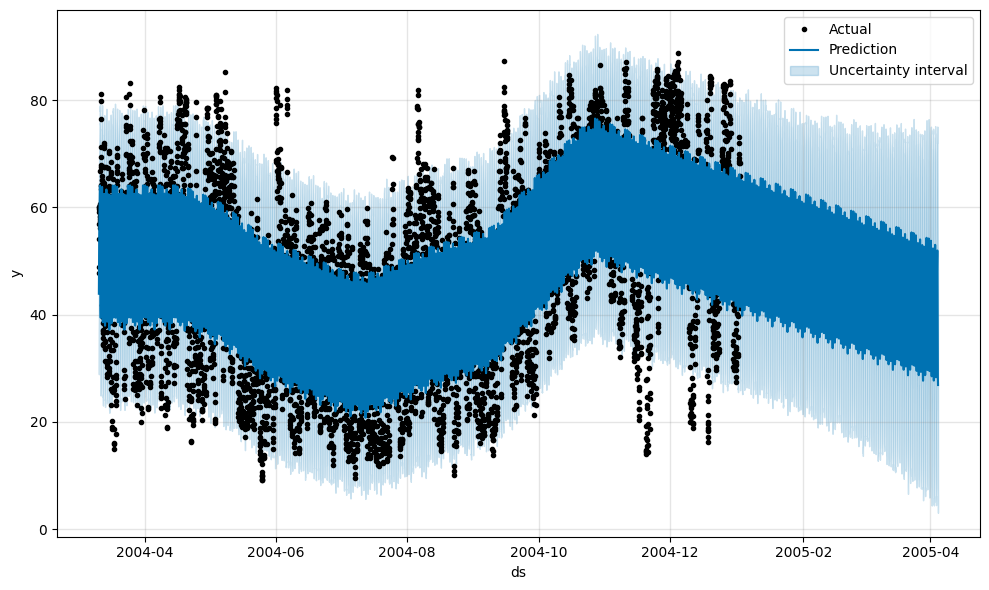

In [105]:
#fig1 = model.plot(forecast)
fig = model.plot(forecast)
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

***Let's take a look on what are the components in forecast***

In [106]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10 18:00:00,51.062373,28.866222,58.190651,51.062373,51.062373,-7.185979,-7.185979,-7.185979,-8.118901,-8.118901,-8.118901,0.932922,0.932922,0.932922,0.0,0.0,0.0,43.876393
1,2004-03-10 19:00:00,51.062434,32.835964,60.741740,51.062434,51.062434,-3.693239,-3.693239,-3.693239,-4.618298,-4.618298,-4.618298,0.925060,0.925060,0.925060,0.0,0.0,0.0,47.369195
2,2004-03-10 20:00:00,51.062495,37.275133,65.030040,51.062495,51.062495,-0.402872,-0.402872,-0.402872,-1.319633,-1.319633,-1.319633,0.916761,0.916761,0.916761,0.0,0.0,0.0,50.659623
3,2004-03-10 21:00:00,51.062556,38.319780,68.224063,51.062556,51.062556,2.070851,2.070851,2.070851,1.162488,1.162488,1.162488,0.908363,0.908363,0.908363,0.0,0.0,0.0,53.133408
4,2004-03-10 22:00:00,51.062617,39.645663,70.214213,51.062617,51.062617,3.823867,3.823867,3.823867,2.923693,2.923693,2.923693,0.900174,0.900174,0.900174,0.0,0.0,0.0,54.886484


In [107]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9352,2005-04-04 10:00:00,40.578466,14.465233,56.757729,23.478165,56.743674,-4.384491,-4.384491,-4.384491,-3.303067,-3.303067,-3.303067,-1.081423,-1.081423,-1.081423,0.0,0.0,0.0,36.193975
9353,2005-04-04 11:00:00,40.572451,7.601806,53.168339,23.462983,56.746407,-9.238130,-9.238130,-9.238130,-8.093631,-8.093631,-8.093631,-1.144499,-1.144499,-1.144499,0.0,0.0,0.0,31.334321
9354,2005-04-04 12:00:00,40.566435,6.341834,52.176693,23.447800,56.749140,-12.097238,-12.097238,-12.097238,-10.895038,-10.895038,-10.895038,-1.202200,-1.202200,-1.202200,0.0,0.0,0.0,28.469197
9355,2005-04-04 13:00:00,40.560419,3.029079,48.929618,23.432618,56.751873,-13.279745,-13.279745,-13.279745,-12.025825,-12.025825,-12.025825,-1.253919,-1.253919,-1.253919,0.0,0.0,0.0,27.280675
9356,2005-04-04 14:00:00,40.554404,5.083697,48.195328,23.417435,56.754606,-13.700139,-13.700139,-13.700139,-12.401033,-12.401033,-12.401033,-1.299107,-1.299107,-1.299107,0.0,0.0,0.0,26.854265


**There are many components in it but the main thing that we would care about is yhat which has the final predictions. _lower and _upper flags are for uncertainty intervals.**

**Final predictions: yhat, yhat_lower, and yhat_upper**

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavio

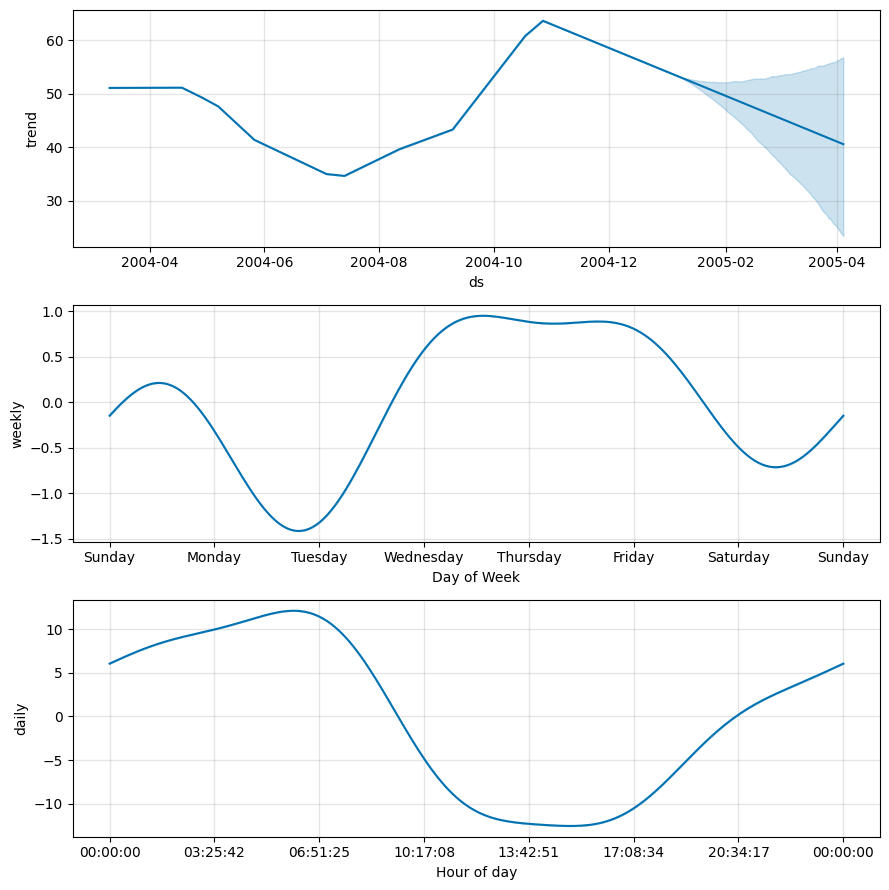

In [108]:
fig2 = model.plot_components(forecast)

# **Evaluate**
**Evaluating the model performance**


In [109]:
# Merge forecasted and actual values
results = pd.merge(test, forecasted, on='ds')


### **Calculate RMSE and Other Metrics:**

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))

# Calculate MAE
mae = mean_absolute_error(results['y'], results['yhat'])

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((results['y'] - results['yhat']) / results['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


RMSE: 14.729876311619929
MAE: 11.868740714284327
MAPE: 23.85480378772848%


# ***Visualising the Results***

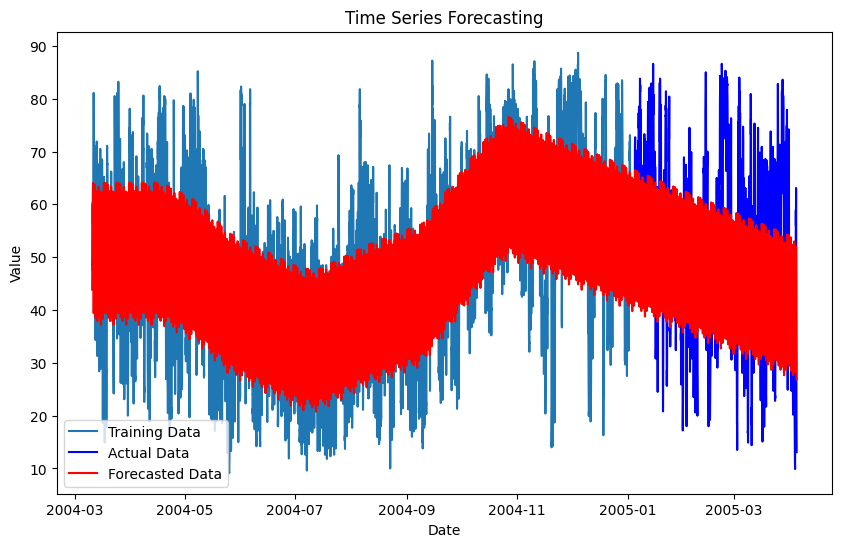

In [111]:
# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()


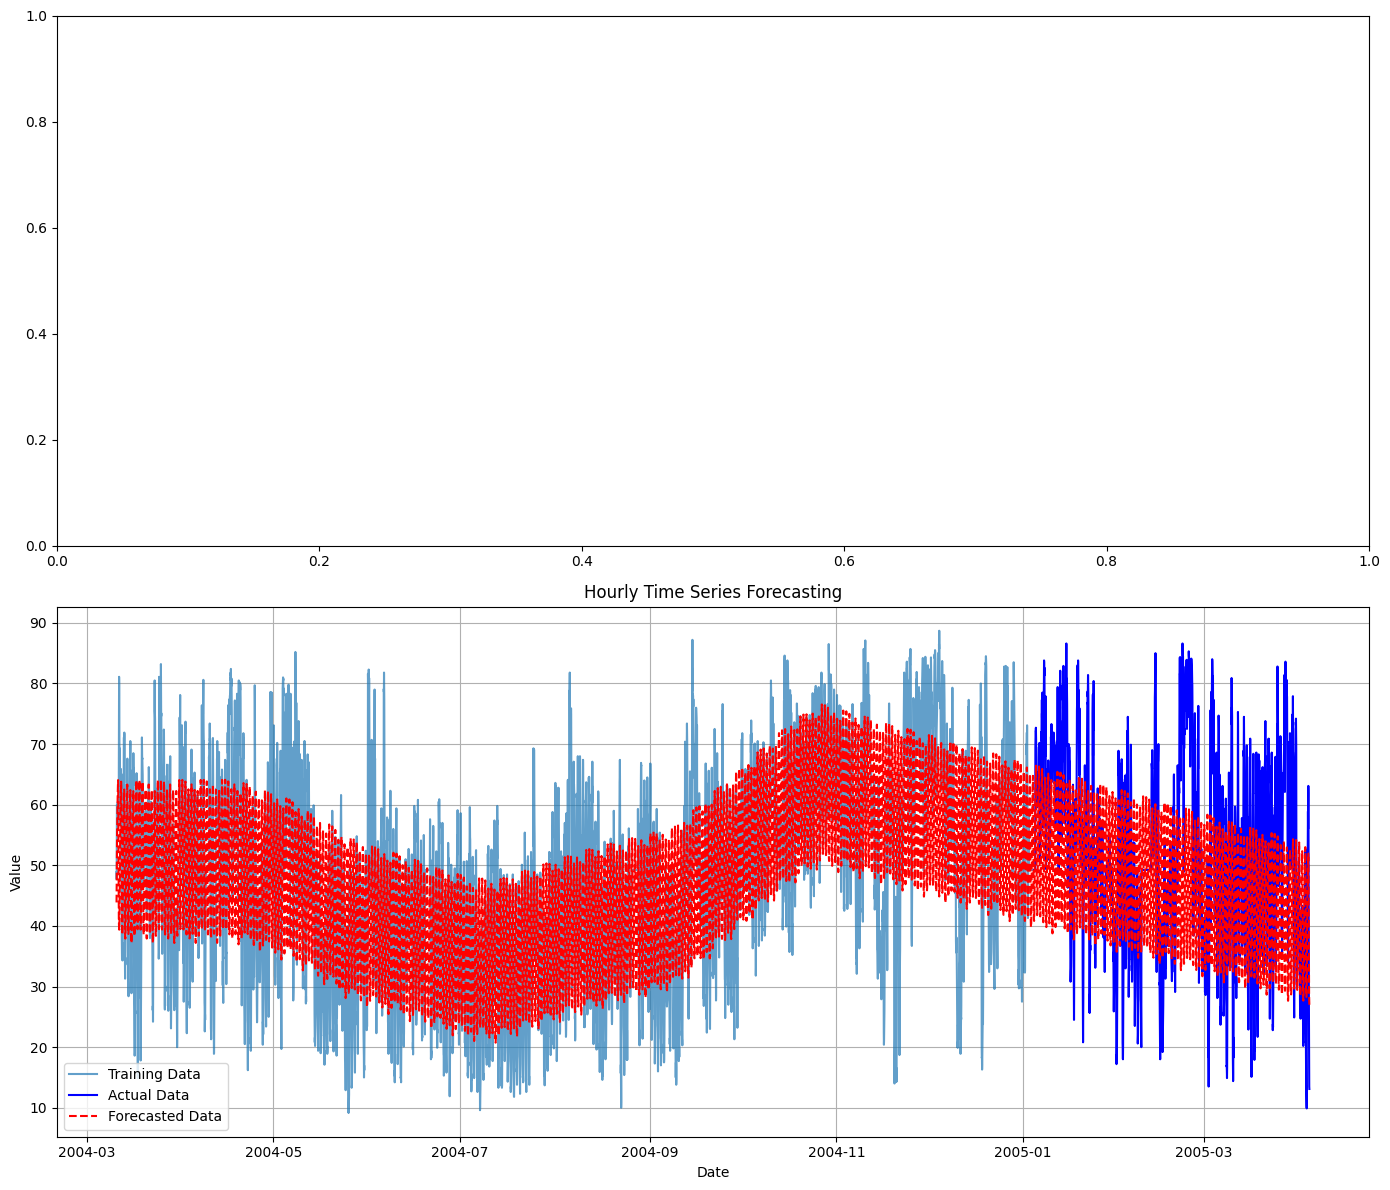

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
# Hourly Data Plot
ax2.plot(train['ds'], train['y'], label='Training Data', alpha=0.7)
ax2.plot(test['ds'], test['y'], label='Actual Data', color='blue', linestyle='-')
ax2.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red', linestyle='--')
ax2.set_title('Hourly Time Series Forecasting')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
